<a href="https://colab.research.google.com/github/Brayan8Ch/-proyectodg/blob/master/challenge_dg_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Cargar el dataset
url = "https://raw.githubusercontent.com/Brayan8Ch/-proyectodg/refs/heads/master/StudentsPerformance.csv"
df = pd.read_csv(url)

print("Dataset cargado exitosamente")
print(f"Dimensiones: {df.shape}")
df.head()

Dataset cargado exitosamente
Dimensiones: (1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [43]:
print("\n1️⃣ INFORMACIÓN BÁSICA DEL DATASET")
print("-"*40)
print(f"📏 Dimensiones: {df.shape}")
print(f"📋 Variables: {df.columns.tolist()}")
print(f"💾 Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

# 1.2 Tipos de datos y valores únicos
print("\n📋 TIPOS DE DATOS Y VALORES ÚNICOS:")
for col in df.columns:
    dtype = df[col].dtype
    unique_count = df[col].nunique()
    print(f"• {col}: {dtype} ({unique_count} valores únicos)")


1️⃣ INFORMACIÓN BÁSICA DEL DATASET
----------------------------------------
📏 Dimensiones: (1000, 8)
📋 Variables: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']
💾 Memoria utilizada: 303.71 KB

📋 TIPOS DE DATOS Y VALORES ÚNICOS:
• gender: object (2 valores únicos)
• race/ethnicity: object (5 valores únicos)
• parental level of education: object (6 valores únicos)
• lunch: object (2 valores únicos)
• test preparation course: object (2 valores únicos)
• math score: int64 (81 valores únicos)
• reading score: int64 (72 valores únicos)
• writing score: int64 (77 valores únicos)


In [44]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


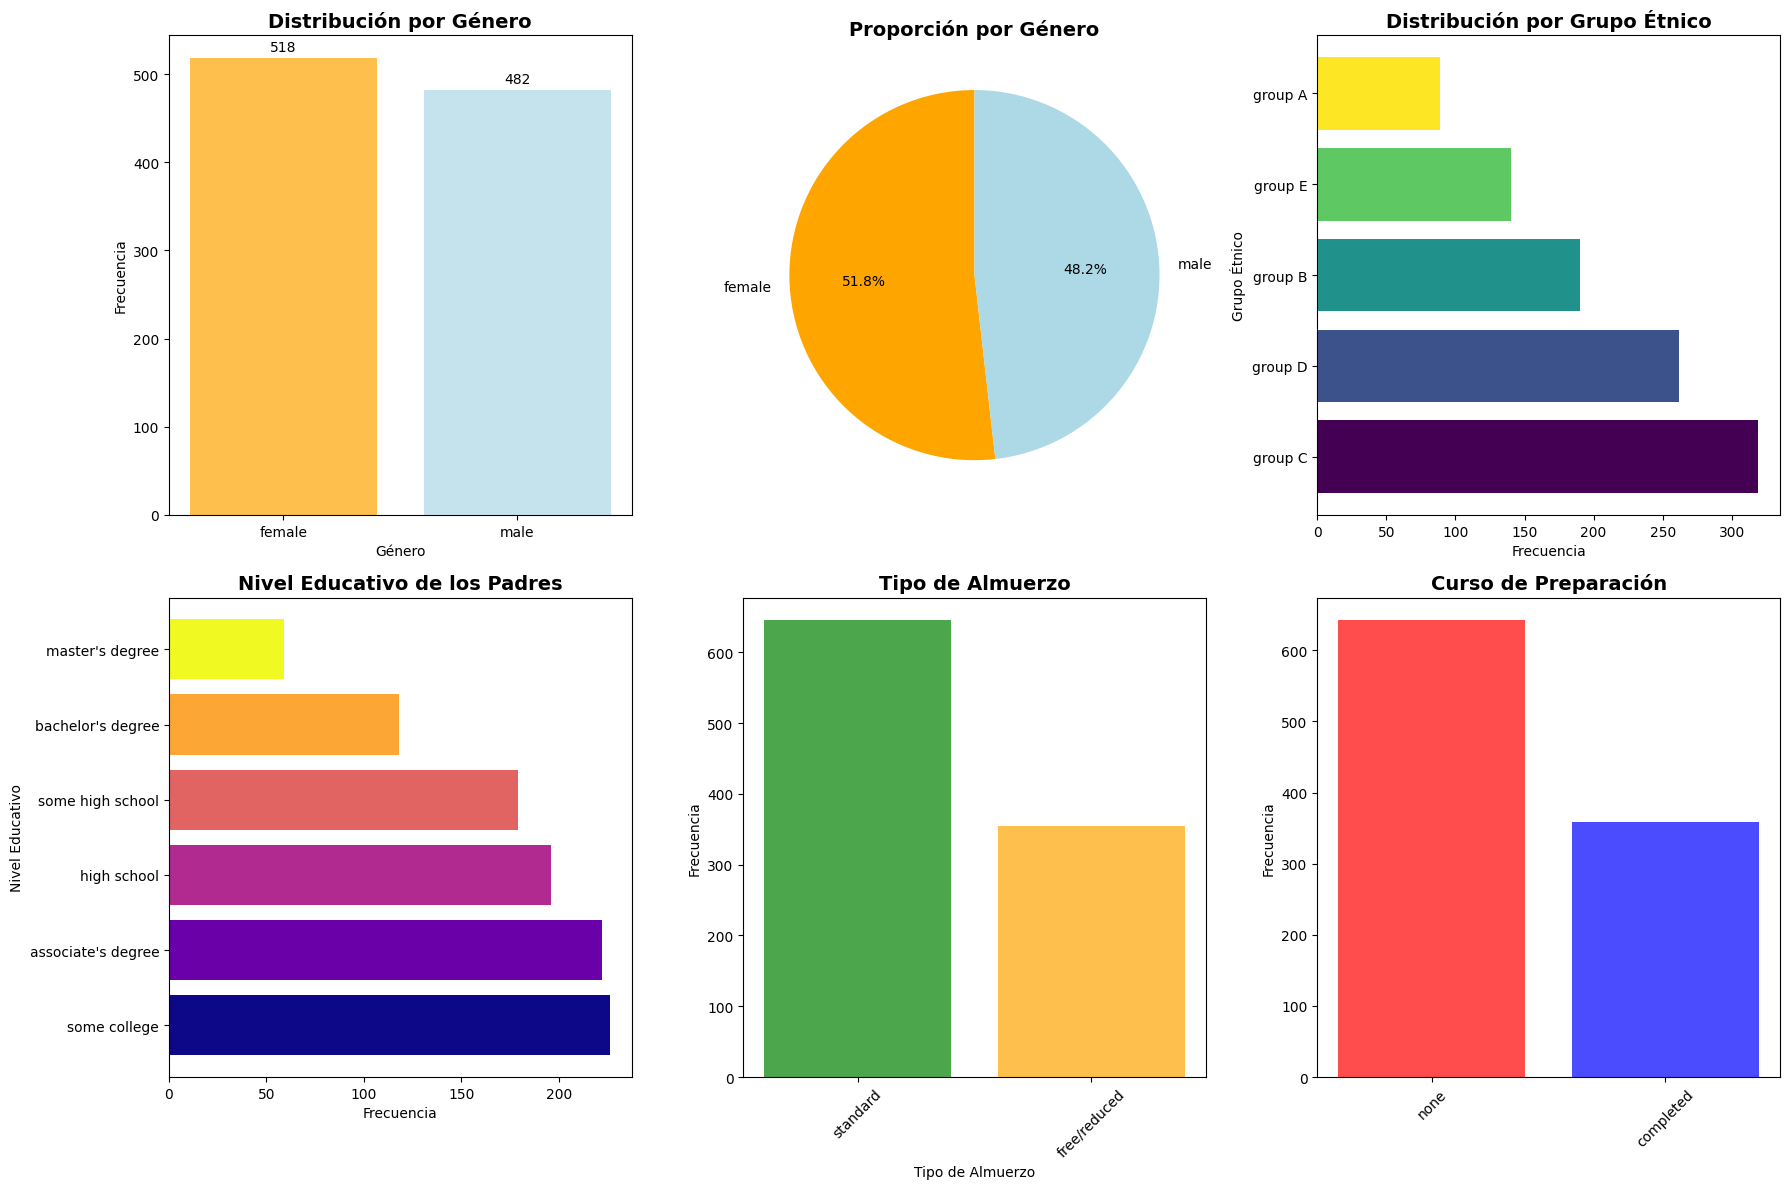

In [60]:
# Preparar conteos de cada variable categórica
gender_counts = df['gender'].value_counts()
race_counts = df['race/ethnicity'].value_counts()
education_counts = df['parental level of education'].value_counts()
lunch_counts = df['lunch'].value_counts()
prep_counts = df['test preparation course'].value_counts()

# Crear figura con subplots (2 filas, 3 columnas)
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# --- Gráfico 1: Distribución por Género (Bar)
bars = axs[0, 0].bar(gender_counts.index, gender_counts.values, 
                     color=['orange', 'lightblue'], alpha=0.7)
axs[0, 0].set_title('Distribución por Género', fontsize=14, fontweight='bold')
axs[0, 0].set_ylabel('Frecuencia')
axs[0, 0].set_xlabel('Género')
for bar in bars:
    height = bar.get_height()
    axs[0, 0].text(bar.get_x() + bar.get_width()/2., height + 5,
                   f'{int(height)}', ha='center', va='bottom')

# --- Gráfico 2: Proporción por Género (Pie)
axs[0, 1].pie(gender_counts.values, labels=gender_counts.index, 
              autopct='%1.1f%%', colors=['orange', 'lightblue'], startangle=90)
axs[0, 1].set_title('Proporción por Género', fontsize=14, fontweight='bold')

# --- Gráfico 3: Distribución por Raza/Etnicidad (Bar horizontal)
bars = axs[0, 2].barh(race_counts.index, race_counts.values, 
                     color=plt.cm.viridis(np.linspace(0, 1, len(race_counts))))
axs[0, 2].set_title('Distribución por Grupo Étnico', fontsize=14, fontweight='bold')
axs[0, 2].set_xlabel('Frecuencia')
axs[0, 2].set_ylabel('Grupo Étnico')

# --- Gráfico 4: Nivel Educativo de los Padres (Bar horizontal)
bars = axs[1, 0].barh(education_counts.index, education_counts.values,
                      color=plt.cm.plasma(np.linspace(0, 1, len(education_counts))))
axs[1, 0].set_title('Nivel Educativo de los Padres', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('Frecuencia')
axs[1, 0].set_ylabel('Nivel Educativo')

# --- Gráfico 5: Tipo de Almuerzo (Bar)
bars = axs[1, 1].bar(lunch_counts.index, lunch_counts.values,
                     color=['green', 'orange'], alpha=0.7)
axs[1, 1].set_title('Tipo de Almuerzo', fontsize=14, fontweight='bold')
axs[1, 1].set_ylabel('Frecuencia')
axs[1, 1].set_xlabel('Tipo de Almuerzo')
axs[1, 1].tick_params(axis='x', rotation=45)

# --- Gráfico 6: Curso de Preparación (Bar)
bars = axs[1, 2].bar(prep_counts.index, prep_counts.values,
                     color=['red', 'blue'], alpha=0.7)
axs[1, 2].set_title('Curso de Preparación', fontsize=14, fontweight='bold')
axs[1, 2].set_ylabel('Frecuencia')
axs[1, 2].tick_params(axis='x', rotation=45)

# Ajustar layout para que no se superpongan los títulos y etiquetas
plt.tight_layout()
plt.show()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


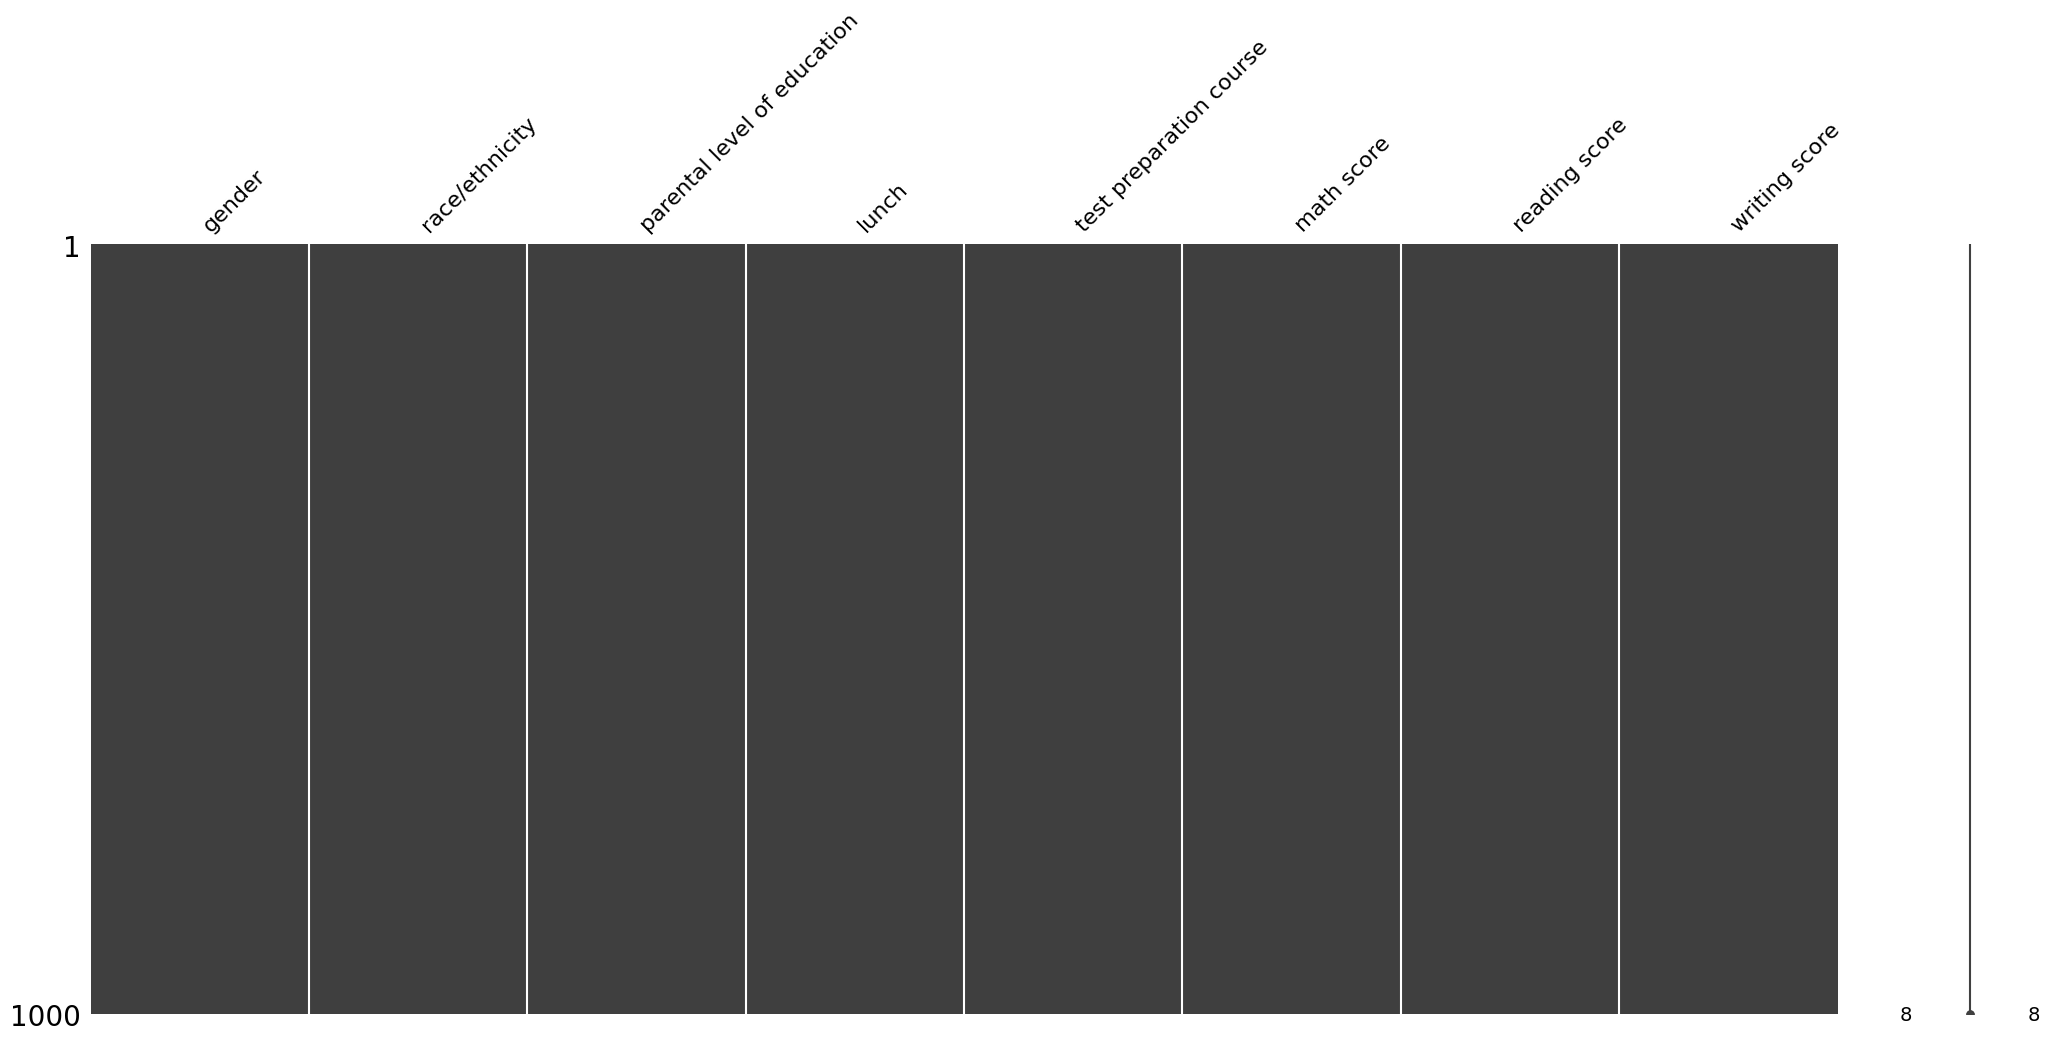

In [ ]:
# Identificación de datos nulos
import missingno as ms 
ms.matrix(df) # Visualización de datos nulos
print(df.isnull().sum()) # Identificación de datos nulos con pandas

In [54]:
# Identificación de datos duplicados
duplicates = df.duplicated().value_counts()
duplicates

False    1000
Name: count, dtype: int64

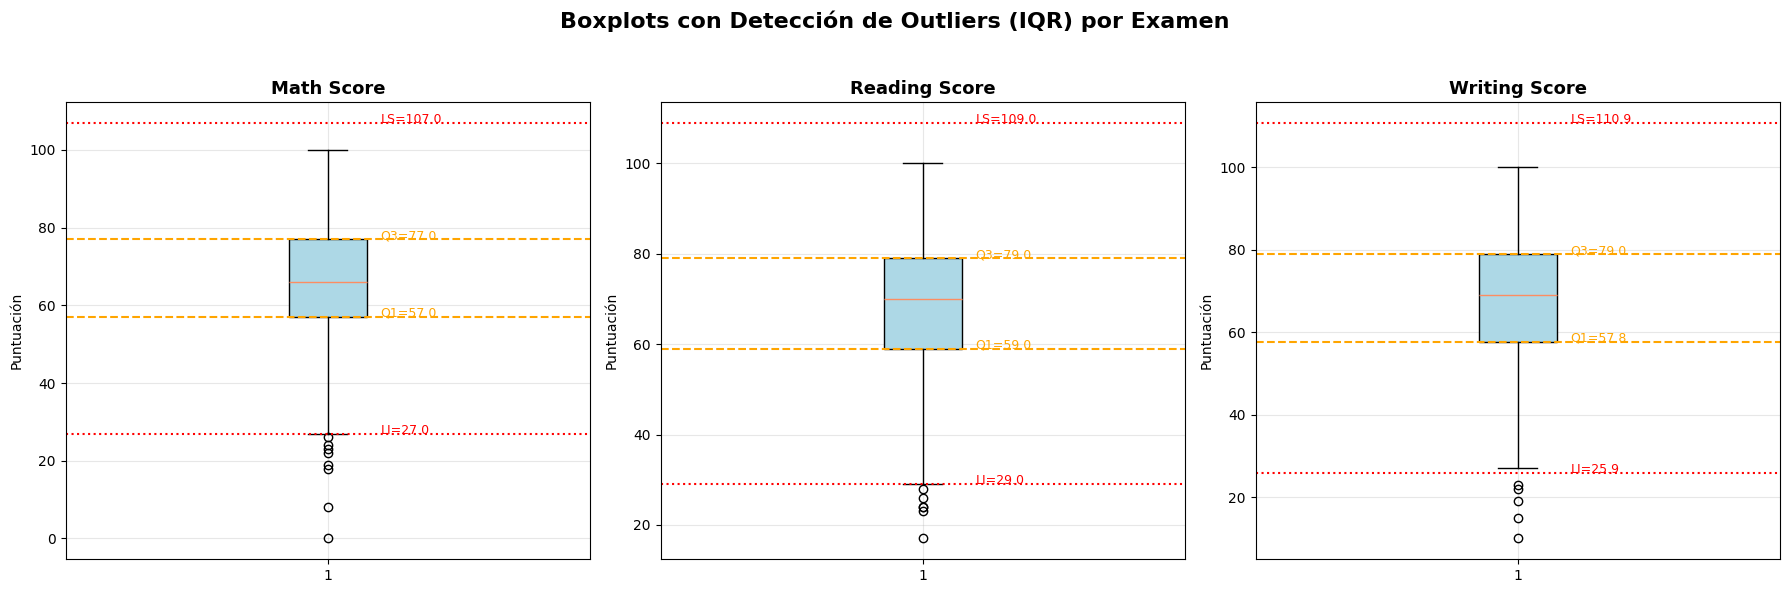

In [59]:
import matplotlib.pyplot as plt

# Configurar nombres de columnas
scores = ['math score', 'reading score', 'writing score']

# Crear figura con 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, score in enumerate(scores):
    # Calcular IQR y límites de outliers
    Q1 = df[score].quantile(0.25)
    Q3 = df[score].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Crear boxplot individual
    axs[i].boxplot(df[score], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axs[i].set_title(f'{score.title()}', fontsize=13, fontweight='bold')
    axs[i].set_ylabel('Puntuación')
    axs[i].grid(True, alpha=0.3)
    
    # Anotar IQR, Q1, Q3 y límites en el gráfico
    axs[i].axhline(Q1, color='orange', linestyle='--', label='Q1')
    axs[i].axhline(Q3, color='orange', linestyle='--', label='Q3')
    axs[i].axhline(lower_limit, color='red', linestyle=':', label='Límite inferior')
    axs[i].axhline(upper_limit, color='red', linestyle=':', label='Límite superior')

    axs[i].text(1.1, Q1, f'Q1={Q1:.1f}', color='orange', fontsize=9)
    axs[i].text(1.1, Q3, f'Q3={Q3:.1f}', color='orange', fontsize=9)
    axs[i].text(1.1, lower_limit, f'LI={lower_limit:.1f}', color='red', fontsize=9)
    axs[i].text(1.1, upper_limit, f'LS={upper_limit:.1f}', color='red', fontsize=9)

# Título general
fig.suptitle('Boxplots con Detección de Outliers (IQR) por Examen', fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
